# Visualizing Correlation Coefficients in Python

Correlation coefficients are a very important aspects to examine prior to machine learning and regression. 
High Colinearity in the indepedent variables will make the regression output unstable can causes large variance in prediction.

The code below can visualize the correlation coefficients between variables in a clear manner. 

In [3]:
# import library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Load the housing data from github

In [4]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url,header=0)

In [5]:
housing.head() # Examine the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Feature Engineering: Add rooms_per_household, population_per_household, bedrooms_per_room to the data

In [6]:
housing_extra_attribs = housing.copy()
housing_extra_attribs["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing_extra_attribs["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing_extra_attribs["population_per_household"]=housing["population"]/housing["households"]

Let's create a scatter matrix using the plotting function in pandas

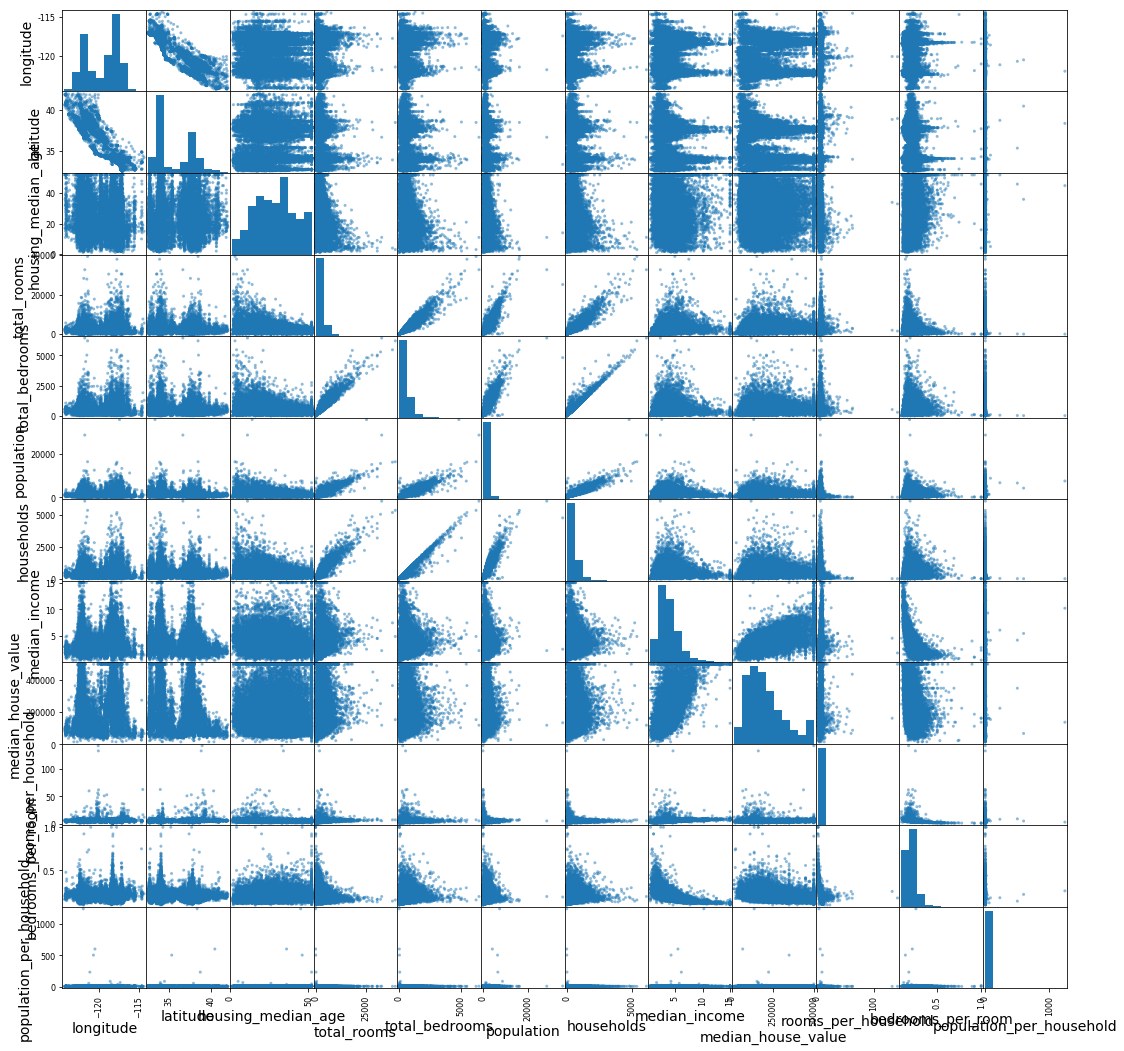

In [7]:
# plot scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(housing_extra_attribs,figsize = (18,18));

The plots above are very large and hard to read due to the large amount of variables in the dataset. In addition, it is hard to quantify the correlations in the plots above. 

We can also create a correlatin matrix using the corr() function from pandas; but the large amount of variables make the correlation coefficient difficult to read. 

In [20]:
corr_matrix = housing_extra_attribs.corr().round(decimals=2)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05,-0.03,0.09,0.00
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14,0.11,-0.11,0.00
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11,-0.15,0.14,0.01
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13,0.13,-0.19,-0.02
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05,0.00,0.08,-0.03
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02,-0.07,0.04,0.07
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07,-0.08,0.07,-0.03
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69,0.33,-0.62,0.02
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00,0.15,-0.26,-0.02
rooms_per_household,-0.03,0.11,-0.15,0.13,0.00,-0.07,-0.08,0.33,0.15,1.00,-0.42,-0.00


The heatmap in the Seaborn packages provides a much better visualization for the correlation coefficients. 

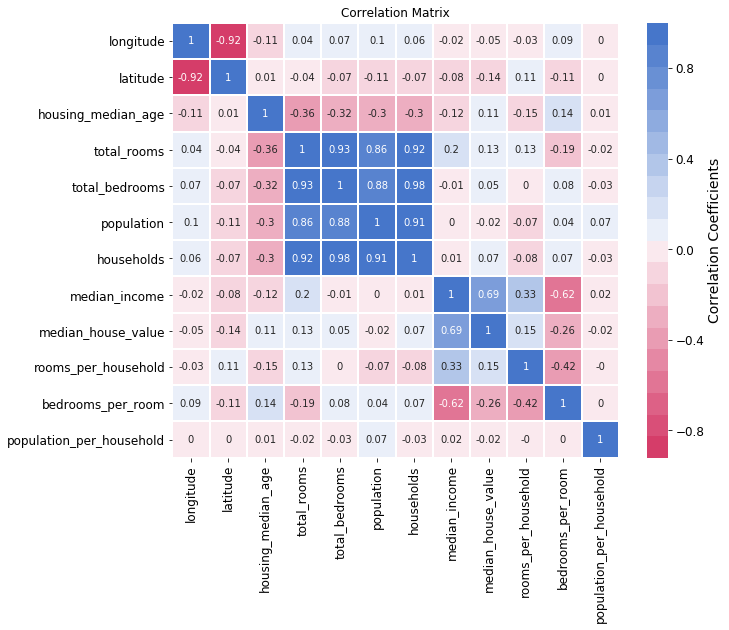

In [21]:

#Seaborn's heatmap version (beautiful)
import seaborn as sns
#axes = plt.axes()
#axes.
plt.figure(figsize=(10, 8)) # change figure size 
plt.title('Correlation Matrix') # add title
Hmap = sns.heatmap(corr_matrix, cmap = sns.diverging_palette(0, 255, sep=10, n=20), # set up diverging color pattern 
            xticklabels=corr_matrix.columns.values, # set up label for each grid in x-axis
            yticklabels=corr_matrix.columns.values, # set up label for each grid in y-axis
            cbar_kws={'label': 'Correlation Coefficients'}, #create title for the color bar
            linewidths = 1, # set up the linewidth in each grid
            annot=True,);  # annot = True will add the numbers to the plot

Now the correlation coefficients can be visualize by color, and the text in the grid is also very informative too. 


# End